In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import warnings
import nltk
import string
import collections
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from collections import Counter

from textblob import TextBlob,Word,Blobber

nltk.download('stopwords')
warnings.filterwarnings('ignore')
filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')
df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

df_w = pd.read_csv("ward_details.csv")

[nltk_data] Downloading package stopwords to C:\Users\Adithi
[nltk_data]     Satish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df.head(40)

,id,createdAt,updateAt,userId,title_id,title,category,description,latitude,longitude,...,civic_agency,civic_agency_title,civic_agency_number,jg_category_id,jg_category,jg_sub_category,user_status,status_id,city_id,createdInJanagraha
0,2529,2019-02-26 08:51:18,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage behind the temple,12.925020,77.590748,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
1,2540,2019-02-26 20:58:20,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution,13.045039,77.590984,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
2,2542,2019-02-26 21:04:38,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution in hebbal,13.030531,77.587002,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
3,2550,2019-02-27 07:43:14,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage is dumped near BES,12.926228,77.588806,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
4,2552,2019-02-27 09:34:35,2019-09-04 23:21:36,622,0,Air Pollution,1,Leaf and garbage burning on Shakthi Ganapathi ...,12.925195,77.590896,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
5,2553,2019-02-27 17:06:02,2019-10-17 12:54:15,876,0,Garbage,6,There is a lot of garbage dump in and around t...,12.956251,77.710715,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
6,2554,2019-02-28 05:59:43,2019-09-05 08:00:02,1322,0,Maintenance/Repair Of Streetlights,2,Replace broken streetlight. Complaint #5 about...,12.948437,77.569115,...,BBMP,BBMP,8.022660e+09,62,Streetlights,Maintenance/Repair Of Streetlights,1,3,1.0,1
7,2555,2019-02-28 09:43:43,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Red Matiz parked on the footpath for more than...,12.950711,77.568224,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
8,2556,2019-02-28 09:49:15,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Cars have been using the footpath as a parking...,12.950390,77.568743,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
9,2560,2019-03-01 08:42:25,2019-07-31 16:20:31,1905,84,Traffic Jams/Congestion Or Bottlenecks,5,Congestion everyday and at all times due to im...,12.932159,77.541598,...,NaN,NaN,NaN,84,Traffic Jams/Congestion Or Bottlenecks,NaN,2,3,1.0,1


In [49]:
df.count()

id                     10723
createdAt              10723
updateAt               10723
userId                 10723
title_id               10723
title                  10723
category               10723
description            10723
latitude               10723
longitude              10723
landmark               10318
location                9993
web_url                 5569
ward_id                10698
ward_title              9234
civic_agency            4667
civic_agency_title      4667
civic_agency_number     5651
jg_category_id         10723
jg_category            10723
jg_sub_category         5569
user_status            10723
status_id              10723
city_id                10719
createdInJanagraha     10723
dtype: int64

In [50]:
df = df.drop(columns = ['jg_sub_category','title_id','web_url','civic_agency_title','civic_agency_number','user_status','createdInJanagraha'])
df.count()

id                10723
createdAt         10723
updateAt          10723
userId            10723
title             10723
category          10723
description       10723
latitude          10723
longitude         10723
landmark          10318
location           9993
ward_id           10698
ward_title         9234
civic_agency       4667
jg_category_id    10723
jg_category       10723
status_id         10723
city_id           10719
dtype: int64

In [51]:
def cor_mat():
    #Correlation Matrix
    corr = df.corr()
    plt.figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


In [52]:
def isint(n):
    try:
        int(n)
        return n
    except:
        return -1;

def ward():
    l = list(df.ward_id.unique())
    len(l)
    ward_count = 0
    for i in df.ward_id:
        if(i<=198):
            ward_count+=1
    print("Noise: ",ward_count)

In [53]:
#cleaning df.location and alloting city/state IDs 

city_number = []
i = 0
for city in df.location:
    #print(str(city))
    if "chennai" in str(df.location[i]).lower():
        city_number.insert(i, 2)
    elif "Tamil Nadu" in str(df.location[i]):
        city_number.insert(i, 2)
    elif "Andhra Pradesh" in str(df.location[i]):
        city_number.insert(i, 4)
    elif "hosur" in str(df.location[i]).lower():
        city_number.insert(i,3)
    elif "bangalore" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "bengaluru" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "560023" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "uttarahalli" in str(df.location[i]).lower():
        city_number.insert(i,1)
    else:
        city_number.insert(i,0)
    i += 1
    
#print(len(city_number))
df['city_number'] = city_number

k = 0
for i in df.location:
        if "chikkajala" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "nagegowdanapalya" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562157" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562129" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "Behind government automobile workshop bangalore" in str(df.landmark[k]):
            df.city_number[k] = 0
        if "562125" in str(df.location[k]).lower() or "562123" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "madanayakahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "thammenahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "poppat jamals" in str(df.landmark[k]).lower() or "mandaveli" in str(df.landmark[k]).lower() or "perundurai" in str(df.landmark[k]).lower():
            df.city_number[k] = 2
        k += 1


k = 0
count = 0
for n in df.city_number:
    if n == 1:
        #print(df.location[k])
        count += 1
    k += 1
print(count)

2960


<BarContainer object of 4 artists>

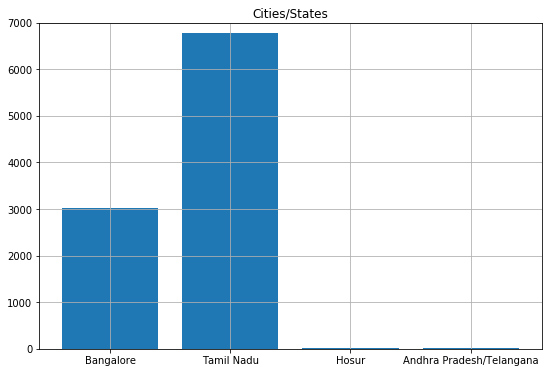

In [54]:
plt.figure(figsize = (9,6))
plt.ylim(0,7000)
plt.title("Cities/States")
plt.grid(True)
plt.bar(['Bangalore','Tamil Nadu','Hosur','Andhra Pradesh/Telangana'],[city_number.count(1),city_number.count(2),city_number.count(3),city_number.count(4)])

In [55]:
c_count = 0
for i in df.location:
    if pd.isna(i):
            c_count+=1
print("Count : ",c_count)

Count :  730


In [56]:
def new_title():
    new_title_id = []
    i = 0
    for name in df.title:
        if name in ['Garbage', 'Garbage Dumping In Vacant Lot/Land', 'Implementation Of Waste Segregation/Garbage', 'Clearance Of Garbage Dump Or Black Spot', 'Clearing Of Roadside Dustbin', 'Collection Of Door-to-door Garbage', 'BPAC – Black Spot']:
            new_title_id.insert(i, 'Waste/Garbage')
        elif name in ['Air Pollution']:
            new_title_id.insert(i, 'Air')
        elif name in ['Maintenance/Repair Of Streetlights', 'Dangling Or Hanging Of OFCs/Cables/Wires', 'Removal Of Illegal Posters And Hoardings']:
            new_title_id.insert(i, 'Streetlights')
        elif name in ['Regular Supply Of Electricity']:
            new_title_id.insert(i, 'Electricity')
        elif name in ['Maintenance And Repair Of Manholes', 'Fixing/Reparing Potholes']:
            new_title_id.insert(i, 'Potholes')
        elif name in ['Traffic Jams/Congestion Or Bottlenecks','Wrong Parking', 'Wrong parking', 'Parking On Footpath']:
            new_title_id.insert(i, 'Traffic/Parking')
        elif name in ['Provide Sewage lines', 'Maintenance And Repair Of Sewage Lines']:
            new_title_id.insert(i, 'Sewage')
        elif name in ['Stop Water Leakage', 'Flooding/Waterlogging Of Roads And Footpaths','Maintenance Of Lake Surrounding']:
            new_title_id.insert(i, 'Water')
        elif name in ['Single Use plastic generator']:
            new_title_id.insert(i, 'Plastic')
        else:
            new_title_id.insert(i, 'Other')
        i = i+1
    df['new_title_id'] = new_title_id
new_title()
df.count()

id                10723
createdAt         10723
updateAt          10723
userId            10723
title             10723
category          10723
description       10723
latitude          10723
longitude         10723
landmark          10318
location           9993
ward_id           10698
ward_title         9234
civic_agency       4667
jg_category_id    10723
jg_category       10723
status_id         10723
city_id           10719
city_number       10723
new_title_id      10723
dtype: int64

{6: 6129, 1: 333, 2: 1178, 5: 662, 7: 1548, 4: 193, 9: 680}


([<matplotlib.patches.Wedge at 0x19fcf7bcb38>,
 [Text(-0.24526668961402678, 1.0723079086558007, '6'),
  Text(-0.9393368107506592, -0.5724040146337028, '1'),
  Text(-0.6035870969350359, -0.9196100349678312, '2'),
  Text(-0.045910922685439975, -1.0990414856492778, '5'),
  Text(0.6262984879178949, -0.9042954185617433, '7'),
  Text(0.9880903022759902, -0.4834020630367052, '4'),
  Text(1.078242385745051, -0.21770015522001965, '9')],
 [Text(-0.13378183069856003, 0.584895222903164, '57.16'),
  Text(-0.5123655331367232, -0.3122203716183833, '3.11'),
  Text(-0.32922932560092866, -0.5016054736188169, '10.99'),
  Text(-0.02504232146478544, -0.599477173990515, '6.17'),
  Text(0.34161735704612445, -0.49325204648822357, '14.44'),
  Text(0.5389583466959945, -0.26367385256547554, '1.80'),
  Text(0.5881322104063914, -0.11874553921091979, '6.34')])

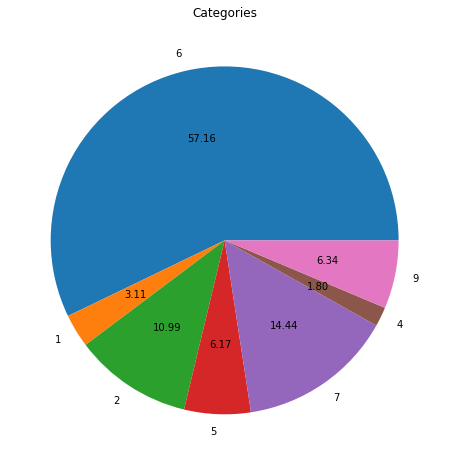

In [57]:
cat = {}
for i in df.category.unique():
    cat[i] = 0

for i in df.category:
    cat[i] +=1

print(cat)
plt.figure(figsize = (8,8))
plt.title("Categories")
plt.pie(cat.values(),labels = cat.keys(),autopct = '%.2f')

{'Waste/Garbage': 5869, 'Air': 333, 'Streetlights': 812, 'Traffic/Parking': 662, 'Sewage': 451, 'Potholes': 1257, 'Electricity': 4, 'Water': 1077, 'Plastic': 258}


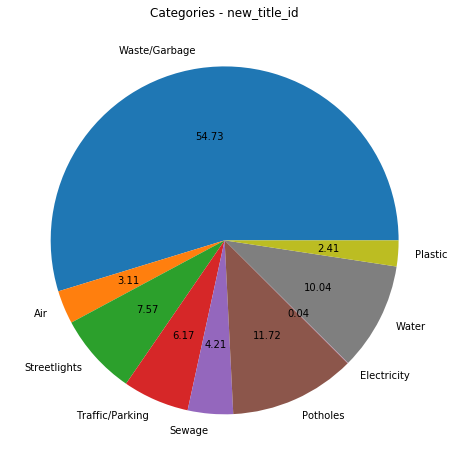

In [58]:
def bar_new_cat():
    new_cat = {}
    for i in df.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (8,8))
    plt.title("Categories - new_title_id")
    #plt.grid(True)
    print(new_cat)
    plt.pie(new_cat.values(),labels = new_cat.keys(),  autopct = '%.2f')# color = ['green','red'], tick_label = df.new_title_id.unique())

bar_new_cat()

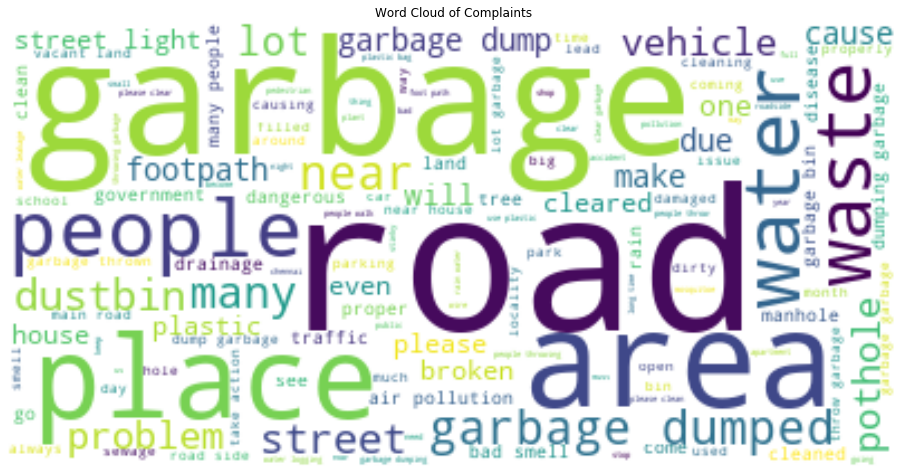

In [59]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(df)

In [60]:
#ward cleaning done only for Bangalore data

k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if "gandhi bazaar" in str(df.location[k]).lower():
            df.ward_id[k] = 142
        if "2nd Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "1st Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "4th ‘T’ Block,Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "4th T Block East" in str(df.location[k]):
            df.ward_id[k] = 168
        if "Hullahalli" in str(df.location[k]):
            df.ward_id[k] = 192
        if "4th Block, Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "560004" in str(df.location[k]):
            df.ward_id[k] = 142
        if "Subramanyapura" in str(df.location[k]):
            df.ward_id[k] = 184
        if "BTM Layout" in str(df.location[k]):
            #print(df.location[k], df.ward_id[k])
            df.ward_id[k] = 188
        if "Shanthala Nagar" in str(df.location[k]):
            df.ward_id[k] = 111
        if "High Grounds" in str(df.location[k]):
            df.ward_id[k] = 93
        if "560062" in str(df.location[k]):
            df.ward_id[k] = 196
        if "Electronic City" in str(df.location[k]):
            df.ward_id[k] = 192
        if "Cheemasandra" in str(df.location[k]) or "Budigere Rd" in str(df.location[k]):
            df.ward_id[k] = 54
        if "1st Stage, Kumaraswamy Layout" in str(df.location[k]):
            df.ward_id[k] = 181
        if "Kannamangala" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Pipelineroadvijayanagarbangalore560023" in str(df.location[k]):
            df.ward_id[k] = 124
        if "Doddakannelli" in str(df.location[k]):
            df.ward_id[k]= 150
            
        if "BTM 2nd Stage" in str(df.location[k]):
            df.ward_id[k] = 188
        if "Seegehalli" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Indiranagar" in str(df.location[k]):
            df.ward_id[k] = 80
        if "Kengeri Satellite Town, Bengaluru" in str(df.location[k]):
            df.ward_id[k] = 159
        if "Armane Nagar" in str(df.location[k]):
            df.ward_id[k] = 35
        if "RT Nagar" in str(df.location[k]):
            df.ward_id[k] = 33
        if "Chamundi Nagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Ganganagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Bairasandra Main Rd" in str(df.location[k]):
            df.ward_id[k] = 58
        if "RR Nagar" in str(df.location[k]):
            df.ward_id[k] = 160
        if "Avalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "HSR Layout" in str(df.location[k]):
            df.ward_id[k] = 174
        if "Hoskote Rd" in str(df.location[k]):
            df.ward_id[k] = 83
        if "MET Layout" in str(df.location[k]):
            df.ward_id[k] = 18
        if "Aavalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "Kempapura" in str(df.location[k]):
            df.ward_id[k] = 7
        if "Arekere" in str(df.location[k]):
            df.ward_id[k] = 193
        if "Nagavara" in str(df.location[k]):
            df.ward_id[k] = 6
        if "560077" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Krishnarajapura" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Nagondanahalli" in str(df.location[k]):
            df.ward_id[k] = 84
        if "Gollarahatti" in str(df.location[k]):
            df.ward_id[k] = 130  
            
   
        #doubtful of vakil
        if "Vakil Garden" in str(df.location[k]):
            df.ward_id[k] = 198
        if "Shobha Hills View Apartment" in str(df.location[k]):
            df.ward_id[k] = 198
        
    k += 1
print(count)

0


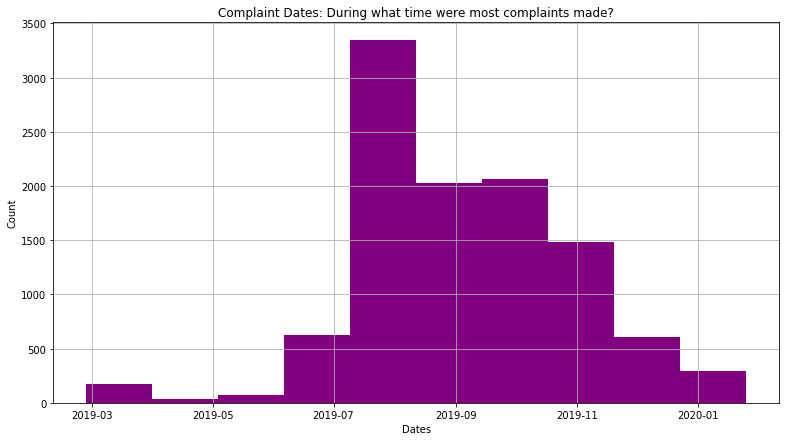

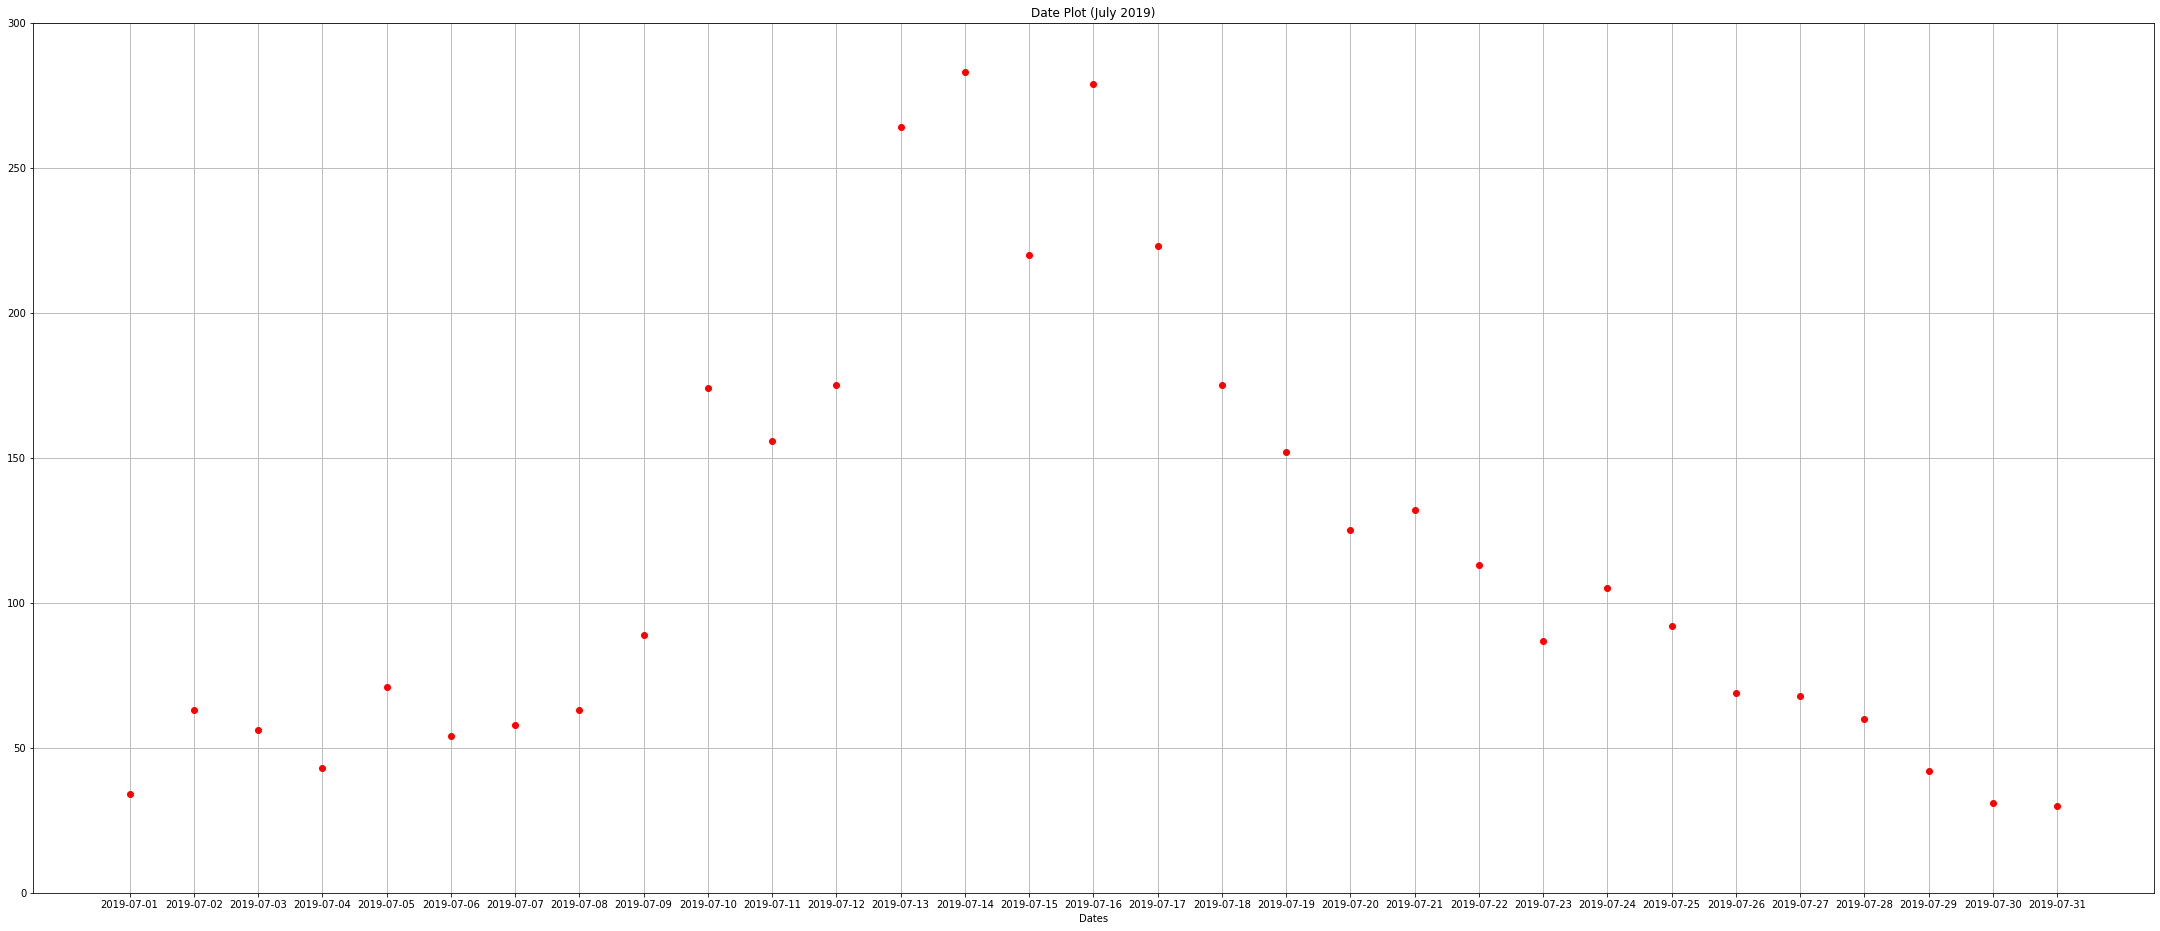

In [61]:
def date_plot():
    df.createdAt = pd.to_datetime(df['createdAt'])
    plt.figure(figsize=(13,7))
    plt.title("Complaint Dates: During what time were most complaints made?")
    plt.xlabel('Dates')
    plt.grid(True)
    plt.ylabel('Count')
    plt.hist(df.createdAt,color='purple')

def date_plot_july():
    dates = []
    for i in df.createdAt:
        d1 = str(i).split(' ')
        d = d1[0].split('-')
        if d[1] == '07':
            dates.append(d1[0])
    date = {}
    for i in dates:
        if i not in date:
            date[i] = 1
        else:
            date[i]+=1
    #print(date['2019-10-02'])
    plt.figure(figsize = (38,16))
    plt.title("Date Plot (July 2019)")
    plt.xlabel("Dates")
    plt.grid(True)
    plt.ylim(0,300)
    plt.plot_date(date.keys(),date.values(),color = 'red')
#plt.hist(dates)

date_plot()
date_plot_july()

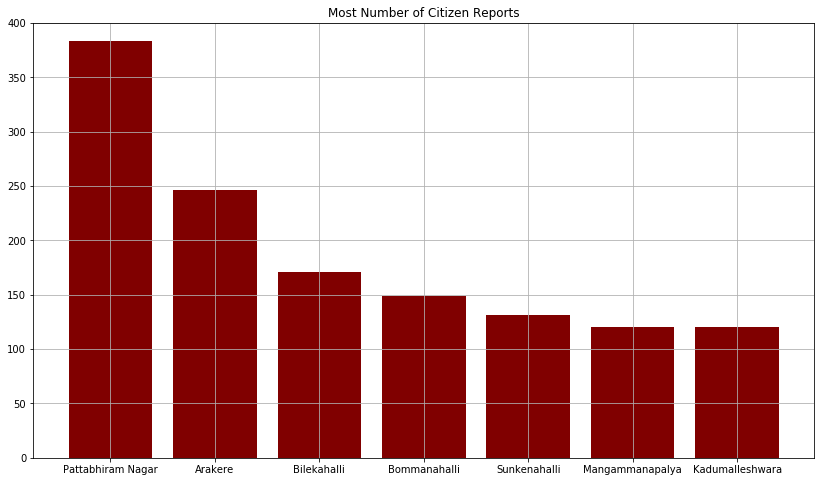

In [62]:
def wardvcomp():
    df_b = df[df['city_number'] ==1]
    ward_complaints = {}
    ward_complaints = Counter(df_b.ward_id)


    plt.figure(figsize = (14, 8))
    plt.title("Most Number of Citizen Reports")
    plt.ylim(0,400)
    plt.grid(True)
    plt.bar(['Pattabhiram Nagar','Arakere','Bilekahalli', 'Bommanahalli', 'Sunkenahalli', 'Mangammanapalya', 'Kadumalleshwara'],[ward_complaints[168], ward_complaints[193], ward_complaints[188], ward_complaints[175], ward_complaints[142], ward_complaints[190], ward_complaints[65]],color = 'maroon')
wardvcomp()

In [63]:
print(df.status_id.unique())

[ 3  1 10  2  9  0]


Status ID Key
0: Complaint Submitted
1: Complaint Opened
2: On the Job
3: Resolved 
9: Complaint Reopened 
10: Dormant



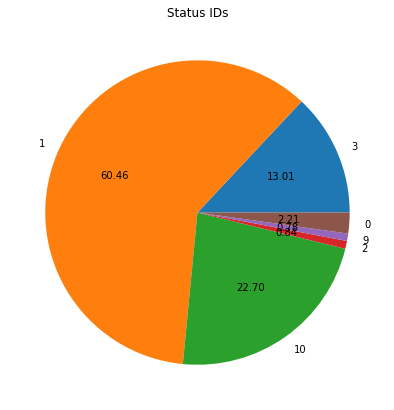

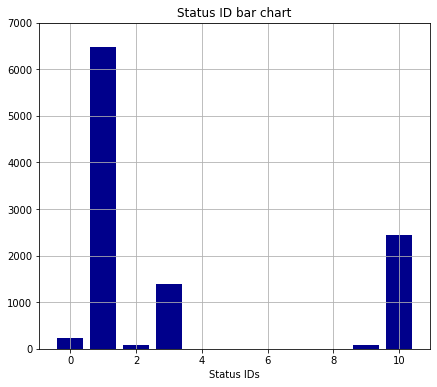

In [64]:
stat = {}
def stat_id_pie(): 
    for i in df.status_id:
        if i not in stat:
            stat[i] = 1
        else:
            stat[i]+=1
    #print(stat)
    plt.figure(figsize = (7,7))
    plt.title("Status IDs")
    plt.pie(stat.values(),labels = stat.keys(),autopct = "%.2f")

def stat_id_bar():
    #print("The status IDs : ",stat)
    plt.figure(figsize = (7,6))
    plt.title("Status ID bar chart")
    plt.grid(True)
    plt.xlabel("Status IDs")
    plt.ylim(0,7000)
    plt.bar(stat.keys(), height=stat.values(), color = 'darkblue')
    
print("Status ID Key\n0: Complaint Submitted\n1: Complaint Opened\n2: On the Job\n3: Resolved \n9: Complaint Reopened \n10: Dormant\n")
stat_id_pie()
stat_id_bar()

{'Waste/Garbage': 1395}


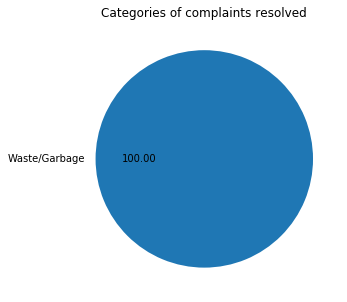

In [65]:
def stat_resolved():
    df1 = df[['new_title_id','status_id']]
    #print(df1)
    #for i in df1.categor
    cat = list(df.new_title_id)
    stat = list(df.status_id)
    res = {}
    for i in stat:
        if i==3:
            ct = cat[stat.index(i)]
            if ct not in res:
                res[ct] = 1
            else:
                res[ct]+=1
    print(res)
    plt.figure(figsize = (5,5))
    plt.title("Categories of complaints resolved")
    plt.pie(res.values(),labels = res.keys(),autopct = '%.2f')
stat_resolved()

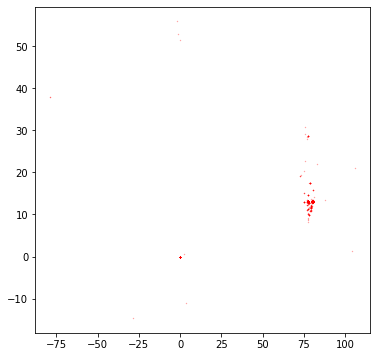

In [66]:
fig, axes = plt.subplots(figsize=(6,6))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()


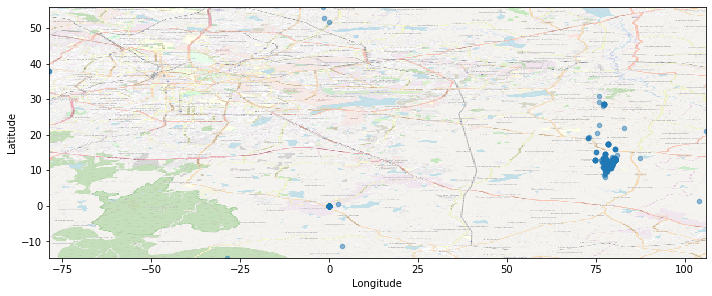

In [67]:
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(10,15), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [min(df.longitude) + epsilon, max(df.longitude) + epsilon, 
             min(df.latitude) + epsilon, max(df.latitude) + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)
'''
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')
# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)'''

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

plt.tight_layout()

plt.show()

In [68]:
print(min(abs(df.latitude)))

0.0


In [69]:
count = 0
for i in df.latitude:
    if int(i)==0:
        count+=1
print(count)

460


In [70]:
df_dict = df.to_dict()
#df_dict
count = 0
for j in range(len(df['id'])):
    if int(df_dict['latitude'][j])==0 and int(df_dict['longitude'][j])==0:
        count+=1
print(count)

459


In [71]:
#hdsf

Categories
Waste/Garbage : 1695
Air : 54
Streetlights : 211
Traffic/Parking : 123
Sewage : 116
Potholes : 405
Electricity : 3
Water : 224
Plastic : 129


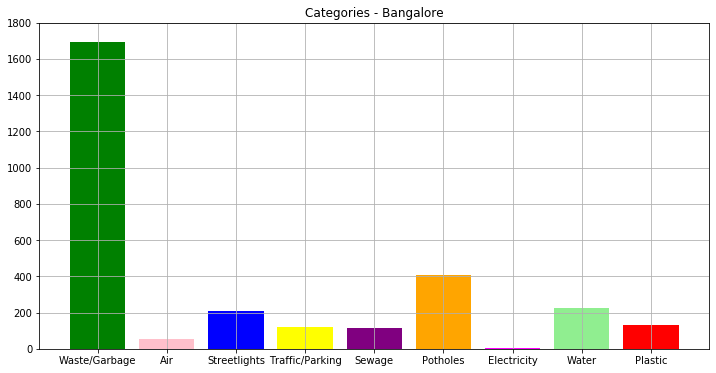

In [72]:
df_b = df[df['city_number']==1]

def cat_b():
    new_cat = {}
    for i in df_b.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (12,6))
    plt.title("Categories - Bangalore")
    #plt.grid(True)
    print("Categories")
    for i in new_cat:
        print(i,":",new_cat[i])
    plt.ylim(0,1800)
    plt.grid(True)
    plt.bar(new_cat.keys(),new_cat.values(),color = ['green','pink','blue','yellow','purple','orange','magenta','lightgreen','red'])# color = ['green','red'], tick_label = df.new_title_id.unique())

cat_b() 

In [73]:
def ward_cleaning():
    count = 0
    noise = []
    for i in df_b.ward_id:
        if i not in list(range(1,199)):
            count+=1
            noise.append(i)
    print(count)
    loc = []
    for i in np.unique(np.array(noise)):
        loc.append((df_b.loc[df['ward_id']==i]).location)
    print(loc)
    
ward_cleaning()


1
[60    bangalore
Name: location, dtype: object]


In [74]:
#df['description'].isnull().sum()

In [75]:
#print(df_b.shape)

In [76]:
df_w.head(10)

,Ward_No,Ward_Name,LS_const
0,1,Kempegowda,Chikballapur
1,2,Chowdeshwari,Chikballapur
2,3,Attur,Chikballapur
3,4,Yelahanka Satellite Town,Chikballapur
4,5,Jakkur,Bangalore North
5,6,Thanisandra,Bangalore North
6,7,Byatarayanapura,Bangalore North
7,8,Kodigehalli,Bangalore North
8,9,Vidyaranyapura,Bangalore North
9,10,Doddabommasandra,Bangalore North


In [77]:
#df.count()


The following cells of code depict a machine learning model that uses NLP to filter and preprocess the text data given in df.description, using df.new_title_id as the target values.
Uses NLTK, RE, SKLEARN libraries

pip install -U scikit-learn HAS to be done before running the below snippets of code

In [106]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

stemmer = PorterStemmer()
words = stopwords.words("english")

#the preprocessing is done in 4 steps:

#removing punctuation
#removing stopwords like 'the', 'this','as',etc
#conversion of the entire text to lower case
#Stemming: reducing the number of inflectional forms of words by reducing all to their common stem.
#For example, 'argue','arguing','argued' are all reduced to 'argu'
df['processedtext'] = df['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [107]:
df1 = df[['description','processedtext']]
df1.head(10)

,description,processedtext
0,garbage behind the temple,garbag behind templ
1,air pollution,air pollut
2,air pollution in hebbal,air pollut hebbal
3,garbage is dumped near bes,garbag dump near be
4,leaf and garbage burning on shakthi ganapathi ...,leaf garbag burn shakthi ganapathi templ premi...
5,there is a lot of garbage dump in and around t...,lot garbag dump around area lot small petti sh...
6,replace broken streetlight. complaint #5 about...,replac broken streetlight complaint
7,red matiz parked on the footpath for more than...,red matiz park footpath month action polic des...
8,cars have been using the footpath as a parking...,car use footpath park space everyday year plac...
9,congestion everyday and at all times due to im...,congest everyday time due improp road construct


In [111]:
#grouping data into test and train based on specific target values, in this case new_title_id
target = df['new_title_id']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.15, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(10723, 21)
(9114,)
(1609,)


In [112]:
#Vectorizing the train and test data using TfIDf vectorization
#TfIdf - Text Frequency Inverse Document Freqeuncy : vectorizes based on frequency across the current text document but less frequency across multiple documents

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) #initializing the vector
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')) #astype('U') converts the dataframe into a Unicode array
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))#transforming the text into frequency vectors
#print(test.tfIdf)
print(vectorizer_tfidf.get_feature_names()[:10])

['aa', 'aal', 'aavin', 'abandon', 'abcdefghiksdnfglfa', 'abhiramapuram', 'abhiyan', 'abiv', 'abl', 'abolish']


In [113]:
#building text classification model using Naive Bayes Classifier (most common one which is based on probability)

nb_classifier = MultinomialNB() #classifier created
nb_classifier.fit(train_tfIdf, y_train) #fitting the classifier onto the training data
pred2 = nb_classifier.predict(test_tfIdf) #predictions made on the unseen data
X_test.head(5)
pred_val = X_test.to_frame()
pred_val['pred_cat'] = pred2
pred_val.head(20)

,processedtext,pred_cat
6154,drain cover,Waste/Garbage
3330,vacant place area garbag dump,Waste/Garbage
1431,multipl dump mainten,Waste/Garbage
9374,clearanc garbag day public trash roadsid,Waste/Garbage
8554,thermocol plastic wood dump,Waste/Garbage
7830,garbag dump next tree,Waste/Garbage
4075,garbag overflow roadsid bin,Waste/Garbage
6933,black spot,Waste/Garbage
8027,park long time hotspot dengu mosquito,Waste/Garbage
8038,sewag leak ling time,Waste/Garbage


In [114]:
#calculating accuracy of the model
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

0.7389683032939715


In [84]:
def sentiment():
    sentiment = []
    text = []
   # print(len(df.description))
    for i in df.description:
        text = TextBlob(i)
        sentiment.append([i,text.sentiment])
    #print(len(sentiment))
    #print((sentiment[:10])[1][0])
    
    for i in sentiment:
        pol = i[1][0]
        if(pol>0):
            print(i[0],pol)

sentiment()

garbage is dumped near bes 0.1
red matiz parked on the footpath for more than 6 months. no action by police despite repeated requests. 0.15
garbage including old cars dumped 0.1
garbage dump. near electric pole 0.1
there is an unused old car also apart from garbage 0.1
old car etc dumped 0.1
filled with garbage 0.4
garbage dumped the whole stretch 0.2
site filled with garbage 0.4
garbage thrown near ssmrv college 0.1
garbage dump near jana bank 0.1
garbage is being dumped near the sbi branch indra nagar 0.1
high pollution in the araa 0.16
infront of no parking.. when there is paid parking right next to that 0.14285714285714285
many potholes along this stretch of road 0.5
burning garbage near bsnl office 0.1
garbage truck filled with garbage parked with no driver  0.4
street light is not working 0.4
there are 2-3 spots near rv college which are on the verge of becoming a dump yard. it should be look immediately and proper bio and recycle bins should be kept here. 0.18333333333333335
the

roadside bins are full and then cows grazing here are eating the covers with the plastic covers so they die so pls put another bin and a garbage collector 0.35
garbages are put in a lot so that they contaminated the soil causing noise pollution which is harmful to humans so pls clean this area 0.3666666666666667
the roadside bin is full so that the people here start putting garbages in a vacant lot near it 0.22499999999999998
the garbage is thrown in this place. so this place is so stinky. it blocks the way and nobody can walk in this place. so please clear it. 0.10000000000000002
near a fancy store 0.1
dangling high tension wires can be risky 0.16
clean this waste please it is a public place. 0.05555555555555556
this is sight near my house. the garbage around the dustbin is more than the garbage which is in the dustbin.the garbage vans comes daily but it is still dirty.the corporation should take measures. 0.19999999999999998
please clean ???? it 0.3666666666666667
we should clean the

as only one dustbin is kept for each street and is cleared once 4 to 5 days a lot of garbage is accumulated. people have no other choice but to drop it on the road as this continues it causes traffic. 0.03125
garbage has been overflowing in ranganath an nagar in porur for more days 0.5
water is a precious thing which is used in our  day to day life. so please save the water and lead a happy life 0.65
water is logging in roads. a lot of water is collected on the road. it is exactly in front of a bus stand. many vechiles pass by this road. the government has to repair this road,or accident may occur 0.375
clean the garbage  0.3666666666666667
in this area red and green light glow at same time for 4 months . i saw live accidents due to this problem . 0.035227272727272725
must clear 0.10000000000000002
this is found on 6th main road. annanagar, chennai 40. this is the road which is used for schools and college kids and hospital and ayappan temple. bike riders fall and many accidents occur 

guys plz make sure that when you are dumping the garbage the bags are tone.so that the garbage does not over flow.  0.5
to many potholes in my locality where water gets collected ( 1 km. away from my house) 0.5
the highway road between chennai and bangalore is damaged so much. on thursday i went in that road , a car was flipped due to a big manhole 0.025000000000000005
huge garbage dump and it is stinking a lot 0.4000000000000001
full of plastic all cows and other animals are eating it  0.11249999999999999
many potholes found near saibaba temple of paneer nagar. please fix it.  0.3
many garbages are dumped on the roadside/pavement from appu flats to dav school mogappair boys.  0.5
clear roadside dustbins near dav mogappair boys school.  0.1
cable wires found near kongu nagar of mogappair 0.1
near the metro water tank office in mogappair many lt of water were on the road and was the leftover of leakage by trucks and lorries. there are also many garbages near this.  0.30000000000000004
t

clear this 0.10000000000000002
most of people 's are put garbage 0.5
full of garbage  0.35
very strict action 0.15000000000000002
clear this 0.10000000000000002
clear this 0.10000000000000002
clear this 0.10000000000000002
first this to be cleared 0.25
clear this first 0.17500000000000002
kindly repair these problems fast, it's taking  lot of time to repair it . 0.4
they are garbage near the road side in the main road . 0.13333333333333333
see these types of problems and solve them fast . 0.2
drainage system is not closed properly in the centre of the road. 0.025
dumping garbages near the main  road. 0.13333333333333333
because of these garbage greenery is getting spoiled so clean the garbage. 0.3666666666666667
near the bus stand the garbage is dumped. 0.1
throwing garbage near the tree so that the tree may get polluted. 0.1
there is a huge of garbage dumped over there. 0.4000000000000001
there is a garbage dump near dav school which disturbs traffic during a peak time especially duri

the place is filled vith  plastic and some leaves  0.4
passenger nuisance can be used effectively 0.6
could be taken care of nicely as it is in front of a pavilion 0.6
they are not using dust bins near shanti sagar hotel. instead of that they are throwing on the roads. 0.1
small junk, easy to clean 0.18333333333333335
garbage dump next to cycle world near sankey tank 0.05
abandoned half constructed building left dump yard people live there as well! 0.0012626262626262614
in the monsoon season we find a lot of potholes . this is not good it can cause a lot accidents. i wish this o e is filled soon. 0.025000000000000022
lots of garbage hasn't been cleared near the roads and are accumulating in large amounts 0.15714285714285714
in my area people dumped leaves as garbage. 
so, please take action to clean it. 0.23333333333333334
in my area people dumped garbage near auto. 
so, please take action to clean it 0.18888888888888888
more than half of flood-related drownings occur when someone driv

huge pothole at gate 7 ramaiah college. posing risk and mobility issue.
interested in a campaign to fix all potholes in msr nagar with my group of volunteers. 0.32500000000000007
we have a garbage and we are unable to clear the garbage  i we go there is many mosquito and foul smell and 1 got malaria 0.03333333333333335
it's foul smelling, attracts houseflies and causes disease near that area. cows eat the garbage and die... 0.1
garbage disposal near my house 0.1
brims gently bccha bccha bccha bro foursome 0.2
there more dust and garbage in our road so clean it 0.43333333333333335
wire is very low ,almost near the floor. please fix this. 0.05
the garbage thrown over here causes more non hygienic problems and diseases we find this problem in every part of chennai 0.5
my pothole filled road 0.4
regarding the malfunctioning of the street lights which leads to utter darkness in the streets during night time, are the root cause for major road accidents. 0.03125
cows are everywhere. people do

this place has water logging for a long period even after rain . no one has come to clear it . 0.02500000000000001
clean the areas 0.3666666666666667
don't  allow animals to eat so clean it
 0.3666666666666667
clean it  0.3666666666666667
clean it  0.3666666666666667
street light not working 0.4
by bursting crackers, it causes air pollution.it is very harmful to our lungs. if we reduce, bursting crackers,it would be a good dead for us and the others in our society. 0.2333333333333333
during the diwali time people are interested in bursting the crackers. this cause 2 major problem which is road and air pollution. bursting of crackers give out a smoke which causes air popollutn 0.15625
actually there are many household garbages and newspapers lying on the road. these are eaten by the cows and dogs and cause them respiratory problems . so i request the municipal corporation to clear 0.19999999999999998
don't waste water we should prevent water leakage because of water leakage and their mo

garbage and plastic are throwing on the road by public bbmp didn't even a small step to solve it because of this land pollution is more. they are not cleaning properly also  0.0625
big ???? is happed in the road because of it a lady met with an accident.. this problem is there from more than a year . 0.25
since the road is damaged at the junction of west end street and ganesh street, there has been frequent waterlogging there. also it creates disturbance for vehicles. hence i hope this gets solved. 0.1
i found a large debris near garbage acting as a site for diseases at the junction of lloyds road and gopalapuram 1st street. it has also occupied the footpath. hence i hope this problem gets solved. 0.10476190476190476
the road near dav boys school has been damaged and hence has caused waterlogging during rainy season. it has also created problems for vehicles. hence i hope this gets solved. 0.1
garbage is have many in street
 0.5
the pothole hasn't been fixed and it has been here for a 